In [1]:
from trajectory_generator import TrajectoryGenerator
import numpy as np
import matplotlib.pyplot as plt
# py.offline.init_notebook_mode(connected=True)

In [2]:
# Berio Code
parameters = {"dt": 0.01, 
              "t_points": np.array([[0,0], [-50, 100], [100,70], [-40, 120]]).T,
              "delta": np.array([0.3, 0.3, 0.3]), 
              "Ac": np.array([0.05, 0.05, 0.05]),
              "delta_t": np.array([0.4, 0.4, 0.4]), 
              "T": 0.3}
              # note: period is for each stroke, with endtime being calculated as t0[0] + t[-1] + period

# Letter G
# parameters = {"dt": 0.01,
#               "t_points": np.array([[0,0], [-100,100], [-200,-100], [-100,-300], [0,-100], [-100,-100]]).T,
#               "delta": np.array([0.4, 0.4, 0.4, 0.4, 0.4]), 
#               "Ac": np.array([0.05, 0.05, 0.05, 0.05, 0.05]),
#               "delta_t": np.array([0.3, 0.3, 0.3, 0.3, 0.7]), 
#               "T": 0.8}

# Fig 8. Djioua08EPM
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]).T, "delta": np.array([-0.5, 0.5]), "Ac": np.array([0.043949, 0.1082468]), "delta_t": np.array([0, 0]), "T": 0.4}
#parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]), "delta": [-0.5, 0.5], "Ac": [0.043949, 0.1082468], "delta_t": [0, 0], "T": [0.5, 0.2]}

t_points = parameters["t_points"]
trajectory_generator = TrajectoryGenerator(**parameters)
trajectory = trajectory_generator.generate_trajectory()
maxima = trajectory_generator.extract_strokes()

#print(trajectory)

print(maxima)

velocity = trajectory_generator.velocity()

inst t0 [0. 0. 0.]
t0 from delt [0.   0.12 0.12]
t0 [-0.10374027  0.01625973  0.13625973]
endtime 0.54
t [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53]
inst t0 [0. 0. 0.]
t0 from delt [0.   0.12 0.12]
t0 [-0.10374027  0.01625973  0.13625973]
endtime 0.54
t [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53]
[72.21044647]
[-34.97986029]
[-4.67686352e-02 -1.64756567e-01 -4.58271833e-01 -1.05882112e+00
 -2.11208062e+00 -3.74611941e+00 -6.04094794e+00 -9.00579629e+00
 -1.25686686e+01 -1.65819345e+01 -2.08416677e+01 -2.51049271e+01
 -2.90809795e+01

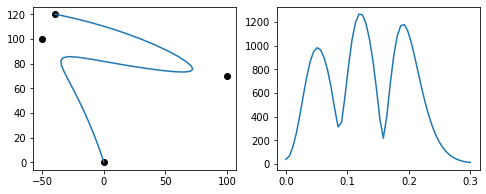

In [3]:
fig = plt.figure(figsize=(8,3))
plt.subplot(121)
plt.scatter(t_points[0,:], t_points[1,:], c='k')
plt.plot(trajectory[0,:], trajectory[1,:])
plt.subplot(122)
t = np.linspace(0, 0.3, trajectory.shape[1])
plt.plot(t, velocity)